In [ ]:
# Image Operations (Histogram Equalization, Correlation and Convolution)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(-0.5, 319.5, 212.5, -0.5)

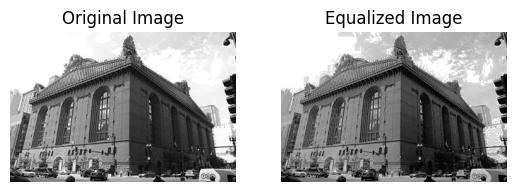

In [4]:
# Using in-built module equalizeHist

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image file
image = cv2.imread('/content/drive/MyDrive/Image for Image Processing/imgonline-com-ua-resize-xM6LvqfufDc_11zon.jpg',cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization (inbuilt module)
equalized_image = cv2.equalizeHist(image)

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalized_image, cmap = 'gray')
plt.title('Equalized Image')
plt.axis('off')


[ 171   28   32   33   25   41   44   56   73   54   71   85   88  100
  113  120  146  142  185  213  212  260  244  261  268  290  297  305
  316  340  320  337  378  395  387  417  380  435  451  378  474  422
  419  427  447  445  463  476  518  393  392  382  454  358  342  365
  350  372  385  345  394  428  362  348  366  373  322  331  331  276
  238  214  232  174  219  200  185  191  187  209  210  192  199  200
  186  194  146  178  189  177  182  163  202  204  186  240  207  181
  206  179  226  194  179  185  184  179  188  176  183  176  177  167
  172  160  165  161  186  143  166  158  170  176  188  188  227  203
  190  242  243  189  231  211  271  270  253  248  236  247  287  247
  291  250  262  241  252  250  252  244  256  242  238  270  284  238
  241  244  267  245  227  244  233  225  230  212  202  201  190  192
  188  176  150  167  163  181  165  153  155  152  153  144  118  121
  112  125   94  100  102   98  106   92  109   93   98   77   72   96
   86 

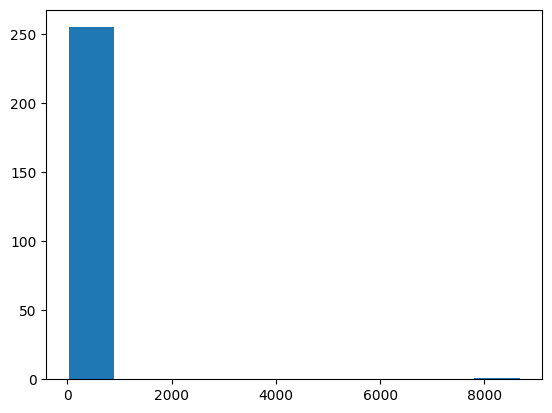

(-0.5, 319.5, 212.5, -0.5)

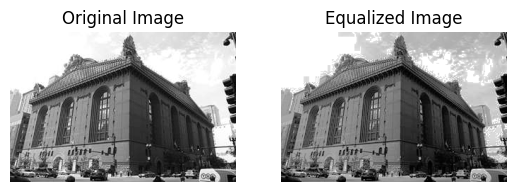

In [8]:
# Without using any inbuilt module

import numpy as np
import matplotlib.pyplot as plt

def calculate_histogram(image):
    histogram = np.zeros(256, dtype = int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1
    print(histogram)
    plt.hist(histogram)
    plt.show()
    return histogram

def calculate_cdf(histogram):
    cdf = np.zeros(256, dtype=int)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]
    return cdf

def histogram_equalization(image, cdf):
    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel_value = image[i, j]
            equalized_image[i, j] = cdf[pixel_value]
    return equalized_image

# Read image file
image = cv2.imread('/content/drive/MyDrive/Image for Image Processing/imgonline-com-ua-resize-xM6LvqfufDc_11zon.jpg',cv2.IMREAD_GRAYSCALE)

# Calculate histogram
histogram = calculate_histogram(image)

# Calculate cumulative distribution function (CDF)
cdf = calculate_cdf(histogram)

# Normalize the CDF to fit the full intensity range
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

# Apply histogram equalization
equalized_image = histogram_equalization(image, cdf_normalized)

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(equalized_image, cmap = 'gray')
plt.title('Equalized Image')
plt.axis('off')
